In [1]:
# Make sure you have a GPU running
! nvidia-smi

Mon Jul 26 23:38:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
| N/A   51C    P8     7W /  N/A |     54MiB /  5934MiB |     26%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from haystack.document_store.elasticsearch import OpenDistroElasticsearchDocumentStore
import umap
import matplotlib.pyplot as plt
from src.top2vec import Top2Vec_mapintel

2021-07-26 23:38:43.359262: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
07/26/2021 23:38:44 - INFO - faiss.loader -   Loading faiss with AVX2 support.
07/26/2021 23:38:44 - INFO - faiss.loader -   Could not load library with AVX2 support due to:
ModuleNotFoundError("No module named 'faiss.swigfaiss_avx2'")
07/26/2021 23:38:44 - INFO - faiss.loader -   Loading faiss.
07/26/2021 23:38:44 - INFO - faiss.loader -   Successfully loaded faiss.
07/26/2021 23:38:44 - INFO - farm.modeling.prediction_head -   Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .
07/26/2021 23:38:45 - INFO - gensim.summarization.textcleaner -   'pattern' package not found; tag filters are not available for English


In [3]:
# Connect to ODElasticsearch instance (needs to be changed for security reasons)
document_store = OpenDistroElasticsearchDocumentStore(host='odfe-node1', 
                                                      username='admin', 
                                                      password='admin', 
                                                      scheme='https', 
                                                      verify_certs=False,
                                                      similarity='cosine',
                                                      return_embedding=True)
print(f"Document Store has {document_store.get_document_count()} documents.")

/usr/local/lib/python3.7/dist-packages/elasticsearch/connection/http_urllib3.py:206: UserWarning: Connecting to https://odfe-node1:9200 using SSL with verify_certs=False is insecure.
  % self.host
/usr/lib/python3/dist-packages/urllib3/connectionpool.py:1006: InsecureRequestWarning: Unverified HTTPS request is being made to host 'odfe-node1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
07/26/2021 23:38:46 - INFO - elasticsearch -   HEAD https://odfe-node1:9200/ [status:200 request:0.234s]
/usr/lib/python3/dist-packages/urllib3/connectionpool.py:1006: InsecureRequestWarning: Unverified HTTPS request is being made to host 'odfe-node1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
07/26/2021 23:38:46 - WARNING - elasticsearch -   PUT https://odfe-node1:9200/document

Document Store has 337056 documents.


In [4]:
# Get list of documents and categories
docs = []
categs = []
doc_gen = document_store.get_all_documents_generator(return_embedding=False)
for i, doc in enumerate(doc_gen):
    docs.append(doc.text)
    categs.append(doc.meta["category"])
    if i == 9999:
        break

/usr/lib/python3/dist-packages/urllib3/connectionpool.py:1006: InsecureRequestWarning: Unverified HTTPS request is being made to host 'odfe-node1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
07/26/2021 23:38:47 - INFO - elasticsearch -   POST https://odfe-node1:9200/document/_search?scroll=1d&size=10000 [status:200 request:1.441s]


In [5]:
# Get dictionary of unique categories
unique_categs = set(categs)
dict_uniques = dict(zip(unique_categs, range(len(unique_categs))))

## Top2Vec - 5d UMAP + 2d UMAP

In [6]:
# Top2vec model - 5d UMAP
model = Top2Vec_mapintel(docs, embedding_model='universal-sentence-encoder')

# Reduce the number of topics discovered by Top2Vec
model.hierarchical_topic_reduction(20)
model.get_topic_hierarchy()

2021-07-26 23:38:49,918 - top2vec - INFO - Pre-processing documents for training
2021-07-26 23:38:49,918 - top2vec - INFO - Pre-processing documents for training
07/26/2021 23:38:49 - INFO - top2vec -   Pre-processing documents for training
2021-07-26 23:38:51,553 - top2vec - INFO - Downloading universal-sentence-encoder model
2021-07-26 23:38:51,553 - top2vec - INFO - Downloading universal-sentence-encoder model
07/26/2021 23:38:51 - INFO - top2vec -   Downloading universal-sentence-encoder model
07/26/2021 23:38:51 - INFO - absl -   Using /tmp/tfhub_modules to cache modules.
2021-07-26 23:38:51.677954: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-26 23:38:51.716096: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-26 23:38:51.716467: I tensorflow/core/common_ru

[[86, 11, 20, 25, 38, 49, 58, 62, 74, 18],
 [50, 70, 87, 0],
 [12, 30, 37, 79, 89, 4],
 [77, 55, 27, 60, 102, 19, 93, 42, 9],
 [51, 23, 13, 40, 76, 103, 104, 14],
 [61, 21, 22, 54, 52, 59, 63, 85, 33],
 [80, 17, 71, 28, 57, 73, 81, 15],
 [46, 99, 98, 101, 2],
 [90, 1],
 [96, 95, 3],
 [45, 72, 39, 16, 44, 82, 43],
 [56, 34, 78, 48, 35, 88, 97, 32],
 [26, 94, 7],
 [64, 36, 53, 68, 67, 65, 69, 41],
 [31, 84, 10],
 [75, 5],
 [91, 8],
 [92, 83, 100, 29],
 [47, 66, 24],
 [6]]

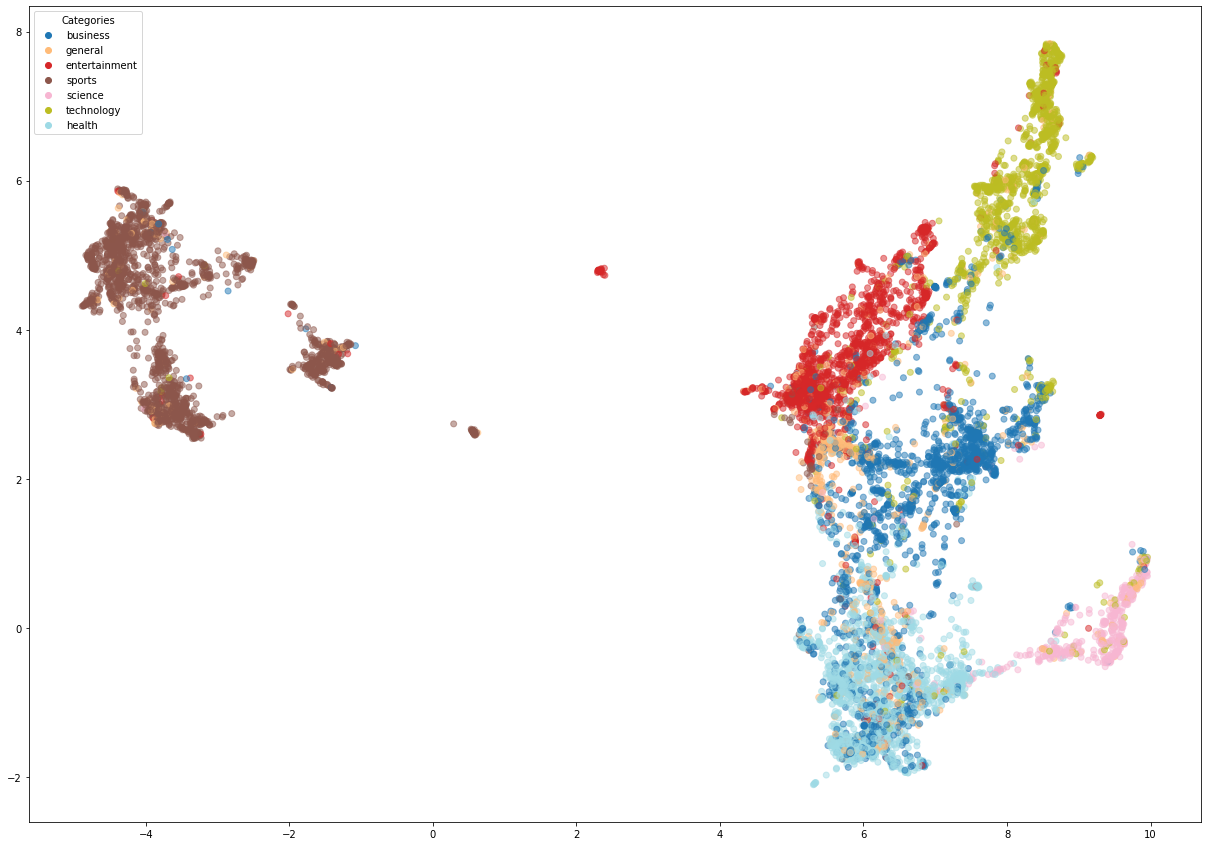

In [7]:
# Get UMAP 5d embeddings
embeddings = model.get_umap().embedding_

# # Do we even need to reduce to 2 dimensions? Can we just look for the best 2D subspace?
# # Reduce to 2 dimensions
# umap_args = {'n_neighbors': 15,
#              'n_components': 2,
#              'metric': 'cosine'}
# umap_model = umap.UMAP(**umap_args).fit(embeddings)
# 
# # Plot 2d embeddings with category labels
# data = umap_model.embedding_
data = embeddings

fig, ax = plt.subplots(figsize=(21,15))

scatter = ax.scatter(data[:, 0], data[:, 3], alpha=0.5, c=list(map(lambda x: dict_uniques[x], categs)), cmap="tab20")

# produce a legend with the unique colors from the scatter
handles, _ = scatter.legend_elements(num=None,  alpha=1)
legend1 = ax.legend(handles, unique_categs, ncol=1, loc="upper left", title="Categories")

plt.show()

In [8]:
# Get topic words
topic_words, word_scores, topic_nums = model.get_topics(20, reduced=True)

# Produce topic labels by concatenating top 5 words
topic_labels = ["_".join(words[:5]) for words in topic_words]

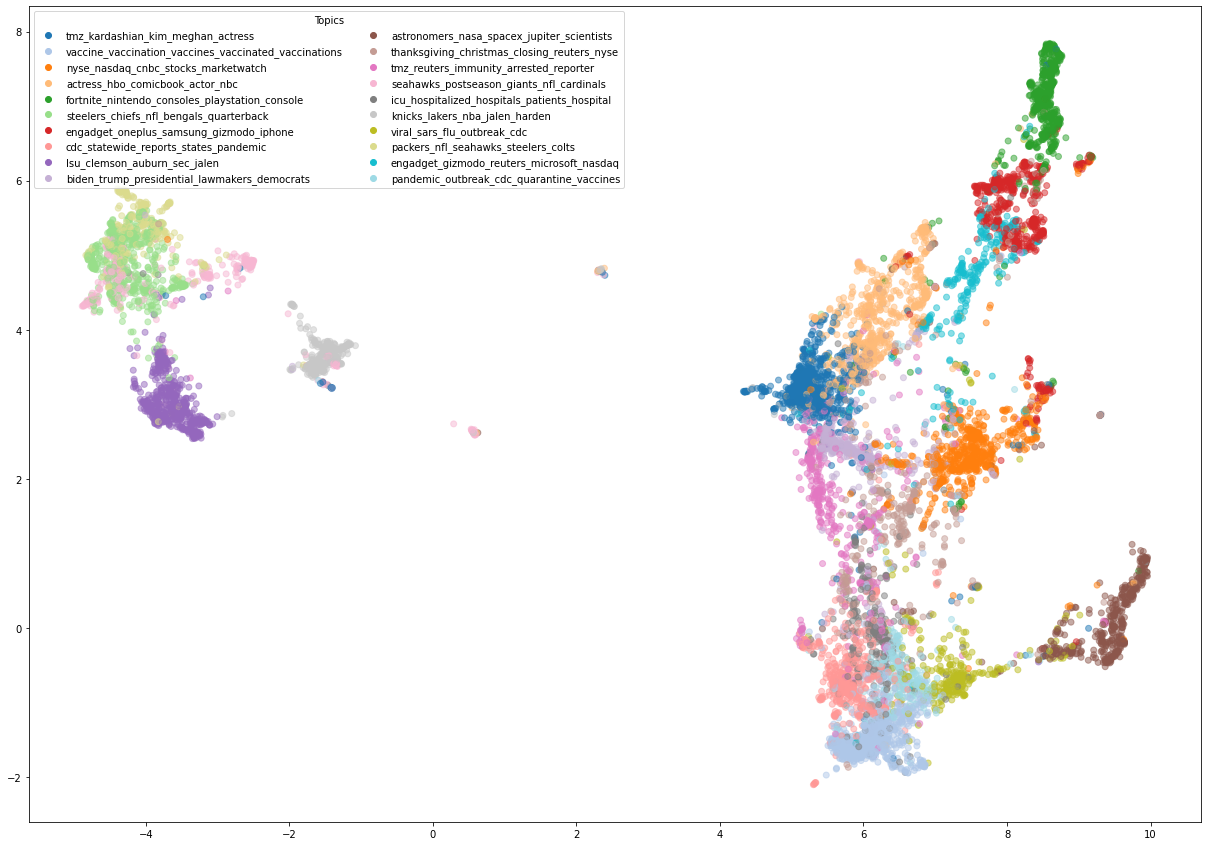

In [9]:
# Plot 2d embeddings with reduced topic labels
fig, ax = plt.subplots(figsize=(21,15))

scatter = ax.scatter(data[:, 0], data[:, 3], alpha=0.5, c=model.doc_top_reduced, cmap="tab20")

# produce a legend with the unique colors from the scatter
handles, _ = scatter.legend_elements(num=None,  alpha=1)
legend1 = ax.legend(handles, topic_labels, ncol=2, loc="upper left", title="Topics")

plt.show()

## Top2Vec - 2d UMAP

In [10]:
# Top2vec model
umap_args = {'n_neighbors': 15,
             'n_components': 2,
             'metric': 'cosine'}
model = Top2Vec_mapintel(docs, embedding_model='universal-sentence-encoder', umap_args=umap_args)

# Reduce the number of topics discovered by Top2Vec
model.hierarchical_topic_reduction(20)
model.get_topic_hierarchy()

2021-07-26 23:39:16,154 - top2vec - INFO - Pre-processing documents for training
2021-07-26 23:39:16,154 - top2vec - INFO - Pre-processing documents for training
07/26/2021 23:39:16 - INFO - top2vec -   Pre-processing documents for training
2021-07-26 23:39:18,181 - top2vec - INFO - Downloading universal-sentence-encoder model
2021-07-26 23:39:18,181 - top2vec - INFO - Downloading universal-sentence-encoder model
07/26/2021 23:39:18 - INFO - top2vec -   Downloading universal-sentence-encoder model
2021-07-26 23:39:21,277 - top2vec - INFO - Creating joint document/word embedding
2021-07-26 23:39:21,277 - top2vec - INFO - Creating joint document/word embedding
07/26/2021 23:39:21 - INFO - top2vec -   Creating joint document/word embedding
2021-07-26 23:39:22,933 - top2vec - INFO - Creating lower dimension embedding of documents
2021-07-26 23:39:22,933 - top2vec - INFO - Creating lower dimension embedding of documents
07/26/2021 23:39:22 - INFO - top2vec -   Creating lower dimension embed

[[61, 31, 29, 35, 43, 59, 70, 73, 90, 98, 4],
 [26, 41, 82, 88, 0],
 [9, 57, 65, 100, 3],
 [37, 50, 93, 1],
 [34, 40, 97, 89, 78, 5],
 [14, 21, 86, 36, 81, 44, 95, 62, 69, 39],
 [53, 30, 94, 54, 92, 75, 49, 83, 99, 11],
 [60, 18, 10, 42, 64, 28],
 [2],
 [15, 48, 32, 67, 76, 79, 17],
 [63, 71, 87, 56, 19, 47, 23],
 [85, 33, 12],
 [45, 96, 7],
 [68, 80, 6],
 [24, 46, 16],
 [72, 8],
 [77, 58, 38, 66, 101, 13],
 [52, 55, 74, 27],
 [22, 91, 20],
 [51, 84, 25]]

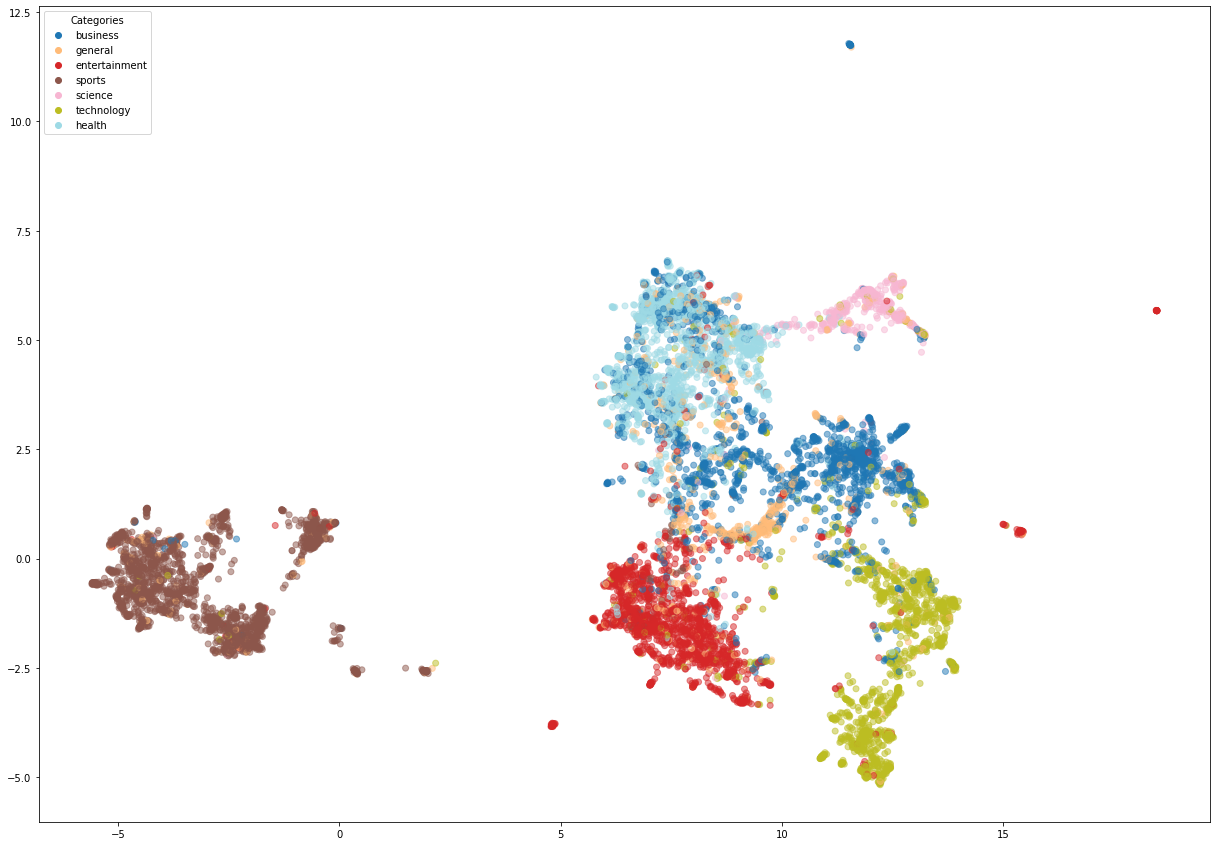

In [11]:
# Plot 2d embeddings with category labels
data = model.get_umap().embedding_

fig, ax = plt.subplots(figsize=(21,15))

scatter = ax.scatter(data[:, 0], data[:, 1], alpha=0.5, c=list(map(lambda x: dict_uniques[x], categs)), cmap="tab20")

# produce a legend with the unique colors from the scatter
handles, _ = scatter.legend_elements(num=None,  alpha=1)
legend1 = ax.legend(handles, unique_categs, ncol=1, loc="upper left", title="Categories")

plt.show()

In [12]:
# Get topic words
topic_words, word_scores, topic_nums = model.get_topics(20, reduced=True)

# Produce topic labels by concatenating top 5 words
topic_labels = ["_".join(words[:5]) for words in topic_words]

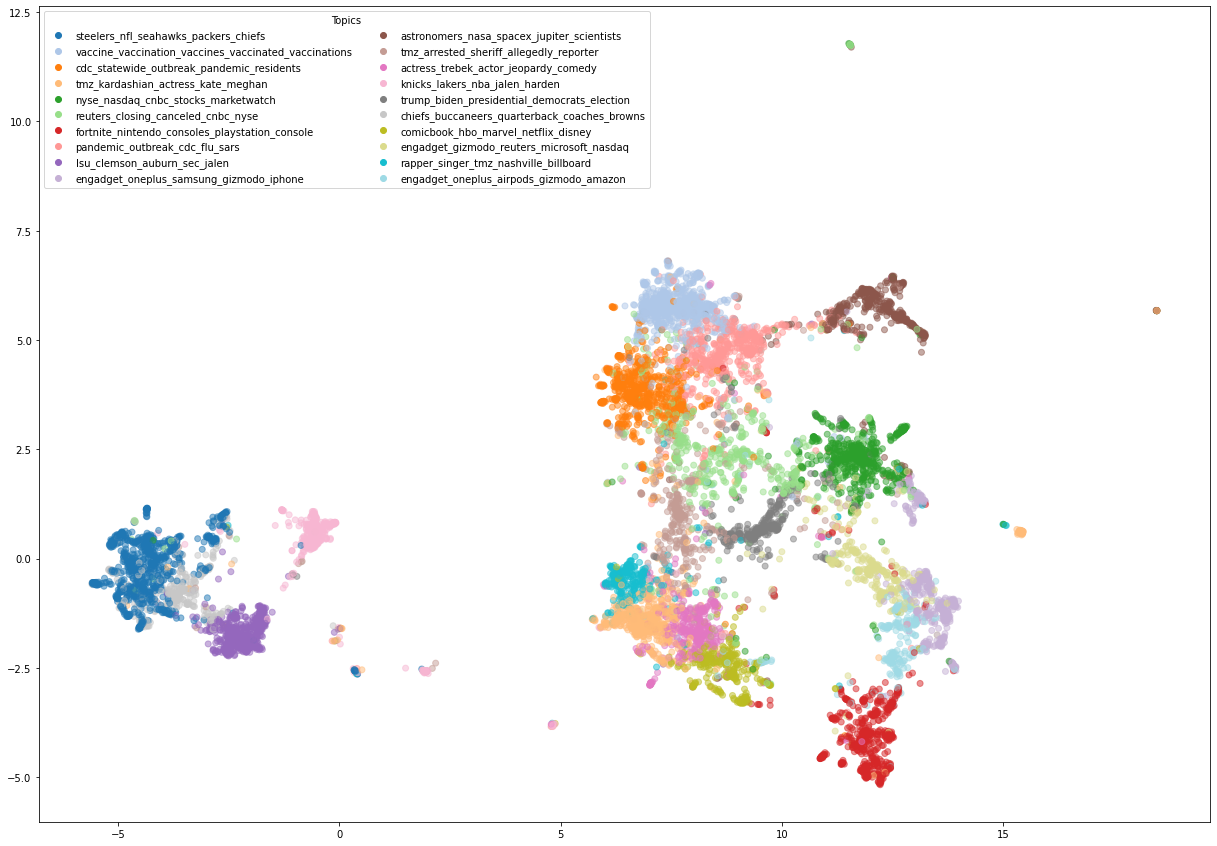

In [13]:
# Plot 2d embeddings with reduced topic labels
fig, ax = plt.subplots(figsize=(21,15))

scatter = ax.scatter(data[:, 0], data[:, 1], alpha=0.5, c=model.doc_top_reduced, cmap="tab20")

# produce a legend with the unique colors from the scatter
handles, _ = scatter.legend_elements(num=None,  alpha=1)
legend1 = ax.legend(handles, topic_labels, ncol=2, loc="upper left", title="Topics")

plt.show()

### Some conclusions from the previous sections:
- Top2Vec on 5 dimensions might achieve better topics than on 2 dimensions, however it comes with the cost of not being visualized. To solve this we can further reduce the space to 2 dimensions (the results weren't good) or we can look for a 2 dimensional subspace that represents the data well (i.e. has good separation between clusters).


## Exploring Top2Vec API

In [15]:
# How many topics there are?
num_topics = model.get_num_topics()
num_topics

96

In [20]:
# What are the topics about?
topic_words, word_scores, topic_nums = model.get_topics(num_topics)

In [21]:
topic_words

array([['vaccine', 'vaccines', 'vaccinated', ..., 'claim', 'researchers',
        'prevention'],
       ['lsu', 'clemson', 'auburn', ..., 'cbs', 'jaguars',
        'championship'],
       ['trump', 'biden', 'presidential', ..., 'planned', 'employees',
        'mayor'],
       ...,
       ['qb', 'espn', 'nfl', ..., 'raiders', 'players', 'titans'],
       ['fortnite', 'trevor', 'consoles', ..., 'campaign', 'session',
        'mission'],
       ['knicks', 'episode', 'spike', ..., 'addition', 'action',
        'mandalorian']], dtype='<U14')

In [22]:
# Search topics based on a keyword
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["apple"], num_topics=5)

In [23]:
topic_nums

array([72, 25, 80, 20, 67])

In [24]:
# Search documents by topic 3
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=3, num_docs=5)

In [25]:
documents

array(['5 things to know before the stock market opens Friday - CNBC U.S. stock futures rose Friday, one day after the Dow, S&P 500 and Nasdaq closed record highs. Here are the most important news, trends and analysis that investors need to start their trading day:1. Wall Street set to continue its record runTraders work on the floor of the NYSE.U.S. stoc',
       '7 Worst Stocks in the Nasdaq on Tuesday: Moderna Slides - TheStreet The worst-performing stocks in the Nasdaq on Tuesday included Moderna, Pinduoduo Inc ADR, and Tesla among others. Stocks were lower Tuesday as a new strain of the coronavirus in the U.K. has Wall Street worried it could spread and lead to fresh restrictions on businesses.The Dow fell 114 points, or 0.38%, to 3',
       "Vertex Pulls Nasdaq Down, but Wall Street Loves Zoom - Motley Fool The stock market continued to lose ground on Thursday afternoon. The Nasdaq Composite(NASDAQINDEX:^IXIC) continued to lose ground on Thursday, adding to a pullback over the la

In [26]:
# Semantic search of documents using keywords
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["Apple"], num_docs=5)

In [27]:
document_ids

array([6156,  376, 1151, 2510, 1417])

In [28]:
documents

array(["Apple in 2021: The iPhone is taking over everything - CNET The tech giant, like the rest of us, will have to contend with COVID-19. But that's only half the story. Now that Apple's iPhones have 5G, and its Macs have M1 chips, what next?Angela Lang/CNETApple has spent the last few years making headline-grabbing changes like its services push, with the $5-per",
       'How to fix the M1 Mac’s most disappointing feature: iOS apps on the Mac - Macworld This should be an amazing unification of Apple’s platforms and a massive expansion of the Mac software base. It’s not, so far. Both Apple and app developers have work to do. If theres a single disappointment in the release of Apples first wave of M1 Macs, its the lackluster launch of iOS apps running inside of macOS. What should be an amazing unification of Apples platfo',
       "14-Inch and 16-Inch MacBook Pro Models Expected to Boost Apple Silicon's Market Share in Second Half of... - MacRumors Apple is expected to release new 14-

In [29]:
# Get document topics - 376 talks about Appple M1 Mac
model.get_documents_topics([376])

(array([72]),
 array([0.7092355], dtype=float32),
 array([['macbook', 'apple', 'mac', 'engadget', 'gizmodo', 'intel',
         'airpods', 'amd', 'iphone', 'premiere', 'windows', 'nvidia',
         'microsoft', 'samsung', 'ios', 'pc', 'technica', 'verge', 'sony',
         'core', 'spacex', 'cnet', 'android', 'oneplus', 'unveiled',
         'major', 'ford', 'conference', 'tesla', 'nasdaq', 'model',
         'rumors', 'chip', 'harry', 'cam', 'jaguars', 'bitcoin', 'gaming',
         'nfc', 'consoles', 'models', 'studio', 'elon', 'lg', 'insider',
         'devices', 'paul', 'meghan', 'instagram', 'assistant']],
       dtype='<U14'),
 array([[0.5537083 , 0.44684428, 0.42722636, 0.32436442, 0.3151921 ,
         0.3037125 , 0.2876514 , 0.2750012 , 0.27080327, 0.22537518,
         0.22520232, 0.22509506, 0.21494767, 0.21268812, 0.20568168,
         0.20514938, 0.200174  , 0.19784465, 0.19340071, 0.18968222,
         0.18681082, 0.18019319, 0.17755358, 0.17646074, 0.17643738,
         0.16891547

In [30]:
# Reduce the number of topics discovered by Top2Vec.
model.hierarchical_topic_reduction(20)
model.get_topic_hierarchy()

[[68, 0],
 [14, 27, 37, 74, 96, 94, 3],
 [40, 26, 66, 73, 34, 38, 69, 101, 10],
 [71, 51, 24, 90, 47, 55, 102, 4],
 [100, 28, 16, 44, 53, 52, 87, 41],
 [77, 12, 39, 56, 92, 91, 97, 99, 13],
 [59, 17, 22, 82, 6],
 [95, 85, 2],
 [93, 1],
 [72, 80, 25, 79, 48, 57, 67, 98, 46],
 [11, 43, 21, 9],
 [50, 31, 62, 45, 32, 89, 30],
 [33, 49, 86, 83, 58, 63, 64, 60, 23],
 [78, 29, 35, 15],
 [54, 36, 42, 61, 20],
 [81, 7],
 [70, 76, 19],
 [75, 5],
 [65, 84, 18],
 [88, 8]]

In [31]:
# What are the topics about?
topic_words, word_scores, topic_nums = model.get_topics(num_topics)

In [32]:
topic_words[[68, 17, 32, 59, 69, 4]]

array([['masks', 'mask', 'immunity', 'protection', 'outbreak', 'sars',
        'faces', 'prevention', 'quarantine', 'pandemic', 'residents',
        'effect', 'cdc', 'contagious', 'infectious', 'viral', 'vaccines',
        'vaccinated', 'vaccine', 'effective', 'flu', 'allergic', 'cases',
        'committee', 'workers', 'face', 'study', 'patients', 'reveals',
        'privacy', 'vaccination', 'symptoms', 'decision', 'effects',
        'authorities', 'benefits', 'wearing', 'risk', 'fda',
        'vaccinations', 'safety', 'claimed', 'policy', 'case', 'three',
        'rules', 'according', 'nine', 'announce', 'shots'],
       ['icu', 'hospitalized', 'illness', 'tmz', 'patients', 'viral',
        'infectious', 'hospital', 'complications', 'healthcare',
        'patient', 'contagious', 'hospitals', 'planned', 'reuters',
        'decision', 'reports', 'news', 'treatment', 'provided', 'severe',
        'reportedly', 'according', 'scheduled', 'cnn', 'health',
        'following', 'reporter', 'g

In [33]:
# Semantic search of documents using a query
# model.query_documents("Apple", 5)

In [34]:
# Accessing the document vectors.
model.document_vectors

array([[-0.06381018, -0.05258903, -0.05559175, ..., -0.06341413,
        -0.05402983, -0.04640045],
       [-0.03443269, -0.05874459,  0.03222519, ...,  0.05637767,
         0.02816404,  0.02296389],
       [-0.00368953, -0.06246883, -0.02790966, ...,  0.06079676,
         0.00250088,  0.03129673],
       ...,
       [-0.04546637,  0.057553  , -0.00644617, ...,  0.05853764,
        -0.05104171, -0.00618022],
       [-0.00335987, -0.048765  , -0.05384766, ...,  0.05213957,
        -0.0260578 ,  0.07472117],
       [ 0.0203954 , -0.03772189, -0.05404608, ..., -0.01636456,
        -0.01750804, -0.00394309]], dtype=float32)

In [35]:
model._get_document_vectors()

array([[-0.06381018, -0.05258903, -0.05559175, ..., -0.06341413,
        -0.05402983, -0.04640045],
       [-0.03443269, -0.05874459,  0.03222519, ...,  0.05637767,
         0.02816404,  0.02296389],
       [-0.00368953, -0.06246883, -0.02790966, ...,  0.06079676,
         0.00250088,  0.03129673],
       ...,
       [-0.04546637,  0.057553  , -0.00644617, ...,  0.05853764,
        -0.05104171, -0.00618022],
       [-0.00335987, -0.048765  , -0.05384766, ...,  0.05213957,
        -0.0260578 ,  0.07472117],
       [ 0.0203954 , -0.03772189, -0.05404608, ..., -0.01636456,
        -0.01750804, -0.00394309]], dtype=float32)

In [36]:
# Topic assignment
model.doc_top

array([81, 38, 14, ..., 14, 10, 69])

In [37]:
# Reduced topics assignment (after hierarchical reduction)
model.doc_top_reduced

array([15, 11,  1, ...,  9,  2,  2])